In [1]:
import gurobipy
import pandas as pd
from oct import *
import numpy as np
import time
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression


In [25]:

## Create artificial data set with
n = 400
x1 = np.random.normal(loc = 0,scale=1, size=n)
x2 = np.random.normal(loc=0, scale=1, size=n)
x3 = np.random.normal(loc=0, scale=1, size=n)
x4 = np.random.normal(loc=0, scale=1, size=n)
x5 = np.random.normal(loc = 0,scale=1, size=n)
x6 = np.random.normal(loc=0, scale=1, size=n)
x7 = np.random.normal(loc=0, scale=1, size=n)
x8 = np.random.normal(loc=0, scale=1, size=n)

y = (x1 < 1) * (x1 > 0) 

y_bar = y

y = y_bar

simulated_data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 
                                'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8,
                                'y': y, 'y_bar': y_bar})

X = simulated_data[[f'x{i}' for i in range(1, 9)]]
y = np.array(simulated_data['y'])
orig_cols = simulated_data.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# scales = np.max(X, axis=0)
# scales[scales == 0] = 1
# X_train = X_train/scales
# X_test = X_test/scales

In [26]:
ORFA = optimalDecisionTreeClassifier(max_depth=2, 
                                     output = False,
                                     warmstart = True,
                                     alpha = 0
                                     )

In [27]:
X_train.shape

(320, 8)

In [28]:
t0 = time.time()
# ORFA.fit(X_train, y_train, scaled = True)
ORFA.fit(X_train, y_train)
t1 = time.time()
total = t1-t0
print(total)

/Users/ryanlucas/Documents/GitHub/An-Optimal-RuleFit-Algorithm/IORFA/oct.py:196: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(y)[0][0]


15.432371139526367


In [29]:
ORFA._a

{(0, 1): 0.0,
 (0, 2): 0.0,
 (0, 3): 0.0,
 (1, 1): 0.0,
 (1, 2): 0.0,
 (1, 3): 0.0,
 (2, 1): 1.0,
 (2, 2): 1.0,
 (2, 3): 1.0,
 (3, 1): 0.0,
 (3, 2): 0.0,
 (3, 3): 0.0,
 (4, 1): -0.0,
 (4, 2): -0.0,
 (4, 3): -0.0,
 (5, 1): -0.0,
 (5, 2): -0.0,
 (5, 3): -0.0,
 (6, 1): 0.0,
 (6, 2): 0.0,
 (6, 3): 0.0,
 (7, 1): 0.0,
 (7, 2): 0.0,
 (7, 3): 0.0}

In [23]:
ORFA._b

{1: 0.036994816605694425, 2: 0.0, 3: 0.07175707979956103}

In [8]:
splits = ORFA._a

thresholds = ORFA._b

rules = {}

for feature, node in splits:
    if splits[(feature, node)] == 1.0:  # check if split occurs
        rule = f"X_train[X_train['x{feature+1}'] >= {thresholds[node]}]"
        rules[node] = rule

for node, rule in rules.items():
    print(f"For node {node}, rule is: {rule}")


For node 1, rule is: X_train[X_train['x1'] >= 0.036994816605694425]


In [9]:
eval(rule)

,x1,x2,x3,x4,x5,x6,x7,x8
300,0.803975,-1.320298,0.982149,1.376936,-0.213074,-0.291363,-2.686595,0.552470
229,3.062193,0.332068,-1.347222,0.459740,-0.554181,-0.989203,0.311670,-0.773986
122,0.157924,-0.865844,-0.866040,0.392687,-0.838505,-0.619560,0.235287,-0.197228
146,1.378484,0.774639,0.627273,0.086259,-0.214058,-1.146699,-0.069358,-1.080969
135,1.000685,0.371602,0.519792,-0.560022,-0.808895,0.445183,-0.080197,1.267807
...,...,...,...,...,...,...,...,...
211,0.936419,-0.148964,-0.781466,0.517271,-0.105549,0.148530,-0.079580,-0.242309
9,2.889870,1.409101,-0.685917,1.840060,-0.042780,0.689461,-0.785449,-2.851387
192,0.072644,-1.810425,-0.056426,0.584070,-0.786330,-0.174095,0.775338,-0.253142
117,0.469979,-2.009403,-0.281698,-0.642083,-0.195371,-0.778727,0.458343,-1.589401


In [10]:
import pandas as pd
import numpy as np

# Assuming data is stored in a pandas DataFrame df
data = {
    "x1": [-0.125236, -0.345539, -0.276631, 0.403196, 0.088546],
    "x2": [-0.077308, -0.206044, -0.390471, -0.133247, 0.788166],
    "x3": [-0.235482, -0.335113, -0.021556, -0.186456, -0.348274],
    "x4": [0.056180, -0.186628, -0.734315, 0.368340, -0.402200],
    "x5": [-0.352838, -0.395455, -0.203241, -0.143673, -0.324978],
    "x6": [-0.131503, -0.091411, 0.094781, 0.175195, -0.397078],
    "x7": [0.286796, 0.471552, -0.339024, -0.153172, 0.115189],
    "x8": [0.000088, 0.163754, -0.057540, 0.277387, -0.163212]
}
df = pd.DataFrame(data)

# Apply the decision rules to the data
for node, rule in rules.items():
    X_train[f'Indicator(node_{node})'] = X_train.loc[eval(rule)].index.values


ValueError: Cannot index with multidimensional key

In [ ]:
X_train

,x1,x2,x3,x4,x5,x6,x7,x8
336,-0.125236,-0.077308,-0.235482,0.056180,-0.352838,-0.131503,0.286796,0.000088
64,-0.345539,-0.206044,-0.335113,-0.186628,-0.395455,-0.091411,0.471552,0.163754
55,-0.276631,-0.390471,-0.021556,-0.734315,-0.203241,0.094781,-0.339024,-0.057540
106,0.403196,-0.133247,-0.186456,0.368340,-0.143673,0.175195,-0.153172,0.277387
300,0.088546,0.788166,-0.348274,-0.402200,-0.324978,-0.397078,0.115189,-0.163212
...,...,...,...,...,...,...,...,...
323,0.290319,-0.021161,0.197146,-0.288848,0.415695,0.358181,-0.127131,-0.107262
192,0.023175,-0.625173,0.194509,0.305723,-0.048579,0.190869,-0.326449,-0.283588
117,-0.502240,-0.169070,0.071534,-0.377533,0.235516,-0.177547,0.062494,0.129664
47,0.061052,-0.313736,0.280986,-0.261104,0.017596,0.093274,-0.019120,-0.085247


In [ ]:
def find_rules_from_node_x(x, odt):

    # Find the active splits (those that are actually used) at the first node
    active_splits_at_node_x =  {i: odt._a[i] for i in list(odt._a.keys()) if (i[1] == x and odt._a[i] == 1)}

    # Store the splitting variable and the threshold together
    for key in list(active_splits_at_node_x.keys()):
        active_splits_at_node_x[(key[0], odt._b[x])] = active_splits_at_node_x[key]
        del active_splits_at_node_x[key]

    # Make rules out of them
    rules_from_node_x = {(f"np.array(X[:, {key[0]}]) <= " + str(key[1]), 
                        f"np.array(X[:, {key[0]}]) > " + str(key[1]) )           
                        for key in active_splits_at_node_x.keys()}
    
    return rules_from_node_x

def chain_rules(odt):
    
    rules_N1 = list(find_rules_from_node_x(1, odt))[0]
    rules_N2 = list(find_rules_from_node_x(2, odt))[0]
    rules_N3 = list(find_rules_from_node_x(3, odt))[0]

    path1 = "(" + rules_N1[0] + ")" + " * " + "(" + (rules_N2[0]) + ")"
    path2 = "(" +(rules_N1[0])+ ")" + " * " + "(" + (rules_N2[1]) + ")"
    path3 = "(" +(rules_N1[1]) + ")" + " * " +  "(" +(rules_N3[0]) + ")"
    path4 = "(" +(rules_N1[1]) + ")" + " * " + "(" +(rules_N3[1]) + ")"


    return [path1, path2, path3, path4]


def add_rules_to_df(rules, X):

    X = np.matrix(X)

    for rule in rules:
        rule_ind = []

        for k in range(X.shape[0]):
            if k in np.where(np.array(eval(rule)).flatten())[0]:
                rule_ind.append(1)
            else:
                rule_ind.append(0)
    
        X = np.hstack((X, np.array(rule_ind).reshape(-1,1)))
    
    return X

def IORFA(X, odt):
    rules = chain_rules(odt)

    betas = [odt.beta[i] for i in list(odt.beta.keys())]
    gammas = [odt.gamma[i] for i in list(odt.gamma.keys())]
    coefficients = betas + gammas
    rule_df = np.matrix(add_rules_to_df(rules, X))

    preds = []
    for i in range(X.shape[0]):
        print(rule_df.shape)

        y_i = sum(rule_df[i, j]*coefficients[j] for j in range(len(coefficients)))
        preds.append(y_i)
    
    return preds, rule_df, coefficients, rules

In [ ]:
np.array(dir(ORFA))

array(['__class__', '__delattr__', '__dict__', '__dir__', '__doc__',
       '__eq__', '__format__', '__ge__', '__getattribute__',
       '__getstate__', '__gt__', '__hash__', '__init__',
       '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__',
       '__new__', '__reduce__', '__reduce_ex__', '__repr__',
       '__setattr__', '__sizeof__', '__str__', '__subclasshook__',
       '__weakref__', '_a', '_b', '_buildMIP', '_c', '_calBaseline',
       '_calMinDist', '_d', '_getRules', '_setStart', 'alpha', 'b_index',
       'beta', 'fit', 'gamma', 'l_index', 'labels', 'max_depth',
       'min_samples_split', 'n', 'n_index', 'optgap', 'output', 'p',
       'predict', 'scales', 'timelimit', 'trained', 'warmstart'],
      dtype='<U17')

In [ ]:
y_train_pred, rule_df, coefs, rules = IORFA(X_train, ORFA)

IndexError: list index out of range

In [ ]:
rules

NameError: name 'rules' is not defined

In [ ]:
X_train

,x1,x2,x3,x4,x5,x6,x7,x8
336,-0.950054,-0.377634,-0.045059,-0.769033,1.782327,0.682384,-0.859266,-0.162295
64,0.184232,-0.096542,-1.117782,0.750524,-0.514876,-1.239468,0.196352,-0.089937
55,1.738975,0.240710,-0.307783,-1.074402,0.185107,0.070177,-0.614003,-0.163165
106,1.093515,1.445844,-2.738722,-0.704068,1.250315,0.001292,1.746983,1.452741
300,-0.929255,1.420577,0.518824,-1.991227,-1.881338,-1.592824,0.845423,0.493028
...,...,...,...,...,...,...,...,...
323,-1.000906,0.431450,0.657782,-0.553405,0.711113,1.318853,0.825502,-0.442495
192,0.417839,0.756178,1.376831,-1.898850,0.286766,0.810857,0.932507,-0.912064
117,0.992720,0.712030,1.684280,0.350101,1.171842,-0.808316,0.330210,-0.528138
47,0.777394,-0.472613,-0.091751,0.741335,-2.149669,-1.458938,1.109577,1.627460


In [ ]:
pd.DataFrame(rule_df)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.950054,-0.377634,-0.045059,-0.769033,1.782327,0.682384,-0.859266,-0.162295,1.0,0.0,0.0,0.0
1,0.184232,-0.096542,-1.117782,0.750524,-0.514876,-1.239468,0.196352,-0.089937,1.0,0.0,0.0,0.0
2,1.738975,0.240710,-0.307783,-1.074402,0.185107,0.070177,-0.614003,-0.163165,0.0,0.0,0.0,1.0
3,1.093515,1.445844,-2.738722,-0.704068,1.250315,0.001292,1.746983,1.452741,0.0,0.0,0.0,1.0
4,-0.929255,1.420577,0.518824,-1.991227,-1.881338,-1.592824,0.845423,0.493028,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
315,-1.000906,0.431450,0.657782,-0.553405,0.711113,1.318853,0.825502,-0.442495,0.0,0.0,0.0,1.0
316,0.417839,0.756178,1.376831,-1.898850,0.286766,0.810857,0.932507,-0.912064,0.0,0.0,0.0,1.0
317,0.992720,0.712030,1.684280,0.350101,1.171842,-0.808316,0.330210,-0.528138,0.0,0.0,0.0,1.0
318,0.777394,-0.472613,-0.091751,0.741335,-2.149669,-1.458938,1.109577,1.627460,1.0,0.0,0.0,0.0


In [ ]:
ORFA._a

{(0, 1): 0.0,
 (0, 2): 0.0,
 (0, 3): 0.0,
 (1, 1): 1.0,
 (1, 2): 1.0,
 (1, 3): 1.0,
 (2, 1): 0.0,
 (2, 2): 0.0,
 (2, 3): 0.0,
 (3, 1): -0.0,
 (3, 2): -0.0,
 (3, 3): -0.0,
 (4, 1): -0.0,
 (4, 2): -0.0,
 (4, 3): -0.0,
 (5, 1): -0.0,
 (5, 2): -0.0,
 (5, 3): -0.0,
 (6, 1): 0.0,
 (6, 2): 0.0,
 (6, 3): 0.0,
 (7, 1): -0.0,
 (7, 2): -0.0,
 (7, 3): -0.0}

In [ ]:
pd.DataFrame(rules).values

array([['(np.array(X[:, 1]) <= 0.15414366899514073) * (np.array(X[:, 1]) <= 0.14474171614167805)'],
       ['(np.array(X[:, 1]) <= 0.15414366899514073) * (np.array(X[:, 1]) > 0.14474171614167805)'],
       ['(np.array(X[:, 1]) > 0.15414366899514073) * (np.array(X[:, 1]) <= 0.1595797615995948)'],
       ['(np.array(X[:, 1]) > 0.15414366899514073) * (np.array(X[:, 1]) > 0.1595797615995948)']],
      dtype=object)

In [ ]:

print("IN-SAMPLE")
print(r2_score(y_train_pred, y_train))
print("OO-SAMPLE")
y_test_pred, rule_df, coefs, rules = IORFA(X_test, ORFA)
r2_score(y_test_pred, y_test)

IN-SAMPLE
-0.9205578783323098
OO-SAMPLE
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)
(80, 12)


-0.8401473524151517

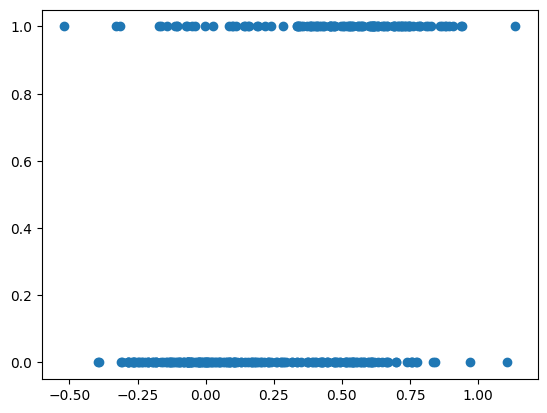

In [ ]:
plt.scatter(y_train_pred, y_train)